In [8]:
import detect as dt
import pandas as pd
import numpy as np
%matplotlib inline

P = np.random.rand(1000,5)

cnt = 0
for p in P:
    if cnt % 3 == 0:
        p[0] = p[0]*10
    else:
        p[0] = p[0]*100
    p[3] = p[3]*100 
    p[4] = np.random.randint(50)
    cnt +=1
    
    
dfa = pd.DataFrame(P)
dfa.columns = ["company1", "company2", "company3","company4", "week"] 

c1means = {}
c1sums = {}
c1medis = {}
c1cnt = {}

grp = dfa.groupby("week")
for g in grp:
    c1means[g[0]] = g[1]["company1"].mean()
    c1sums[g[0]] = g[1]["company1"].sum()
    c1medis[g[0]] = g[1]["company1"].median()
    c1cnt[g[0]] = g[1]["company1"].count()

new_vals = {}
new_vals["mean"] = []
new_vals["sum"] = []
new_vals["medi"] = []
new_vals["count"] = []
new_vals["week"] = []
#modify dfa to add c1 means
for week in list(dfa["week"].unique()):
    new_vals["week"].append(week)
    new_vals["mean"].append(c1means[week])
    new_vals["sum"].append(c1sums[week])
    new_vals["medi"].append(c1medis[week])
    new_vals["count"].append(c1cnt[week])
df2 = pd.DataFrame(new_vals)
df2.set_index("week")
df2.index.name = "week"



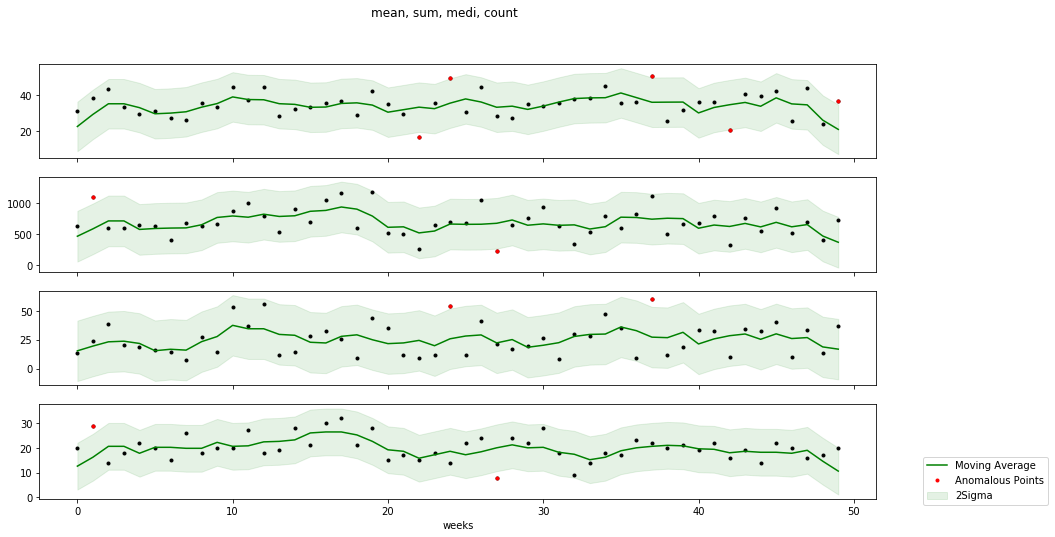

In [9]:
an = dt.anom_detect( method='average', mode="same")
df = df2
an.evaluate(df)
an.plot()
